# Data Classes

this tutorial is from https://github.com/keithgalli/sklearn /////////   
  https://www.youtube.com/watch?v=M9Itm95JzL0&t=5415s&ab_channel=KeithGalli

In [1]:
from random import shuffle

class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE' 

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        # positive_shrunk is = to the length of negatives
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk # final reviews
        shuffle(self.reviews)
        
        
        #print(negative[0].text)
        #print(len(negative))
        #print(len(positive))        
        

Load Data

In [2]:
import json

file_name = '/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML-Supervised-learning-2/Positive_negative/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
print(reviews[5].text)
print('The comment is: ', reviews[5].sentiment)

I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia's trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character's voice on a strong subject and making it so that other peoples story may be heard through Mia's.
The comment is:  POSITIVE


# Prep Data

In [3]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)
print('training model len: ' ,len(training))
print('training model len: ' ,len(test))

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)



training model len:  6700
training model len:  3300


In [4]:
# Distribute positives and negataives evenly
train_container.evenly_distribute()
len(train_container.reviews)


train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))

print(train_y.count(Sentiment.NEGATIVE))




436
436


Bad of words vectorization


In [5]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

#train_x_vectors
#train_y

We&#8217;ve all read the official account of how Princess Diana died, and some of us have even treated ourselves to a raft of alternative accounts too, some plausible, others perhaps not so. But this book is unique, the story it tells compelling and enlightening, and I find myself likening the experience of the author to that of other noble whistleblowers (Ed Snowden comes to mind) who have risked their necks to reveal what our governments would rather we didn&#8217;t know about.What happened to Jon King beggars belief, and goes to show just how far our &#34;out of control&#34; intelligence agencies are prepared to go in order to achieve their goals. For this reason alone everyone should read this book.  Thumbs up!
[[0. 0. 0. ... 0. 0. 0.]]


# Classification


### Linear SVM

In [6]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

print(test_x[0])
clf_svm.predict(test_x_vectors[0])




This is such a wonderful book!  I am finishing my third project already and can't wait to do more!  The instructions are very clear and concise, and most of all FUN!  This is the best knitted toy book I have .  love the patterns!!


array(['POSITIVE'], dtype='<U8')

# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
 
# fit 
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

# Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

    #Fit
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
#predict 
clf_gnb.predict(test_x_vectors[0].toarray())




array(['NEGATIVE'], dtype='<U8')

# Logistic Regression (classifier)

In [9]:
from sklearn.linear_model import LogisticRegression
#Fit
clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)
#predict
clf_log.predict(test_x_vectors[0])


array(['POSITIVE'], dtype='<U8')

# Evaluation

In [10]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors.toarray(), test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8076923076923077
0.6346153846153846
0.6610576923076923
0.8052884615384616


# F1 scores

In [11]:
# F1 scores
from sklearn.metrics import f1_score


print('SVM',f1_score(test_y, clf_svm.predict(test_x_vectors), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Decision Tree: ',f1_score(test_y, clf_dec.predict(test_x_vectors), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Naive Bayes: ',f1_score(test_y, clf_gnb.predict(test_x_vectors.toarray()), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Logistic Regression: ',f1_score(test_y, clf_log.predict(test_x_vectors), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))


SVM [0.80582524 0.         0.80952381]
Decision Tree:  [0.63461538 0.         0.63461538]
Naive Bayes:  [0.65693431 0.         0.66508314]
Logistic Regression:  [0.80291971 0.         0.80760095]


/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted 

Models Count

In [12]:
print('Train =  ')
print('POSITIVE:',train_y.count(Sentiment.POSITIVE))
print('NEGATIVE:',train_y.count(Sentiment.NEGATIVE))
print('NEUTRAL: ',train_y.count(Sentiment.NEUTRAL))

print('Test = ')
print('POSITIVE:',test_y.count(Sentiment.POSITIVE))
print('NEGATIVE:',test_y.count(Sentiment.NEGATIVE))
print('NEUTRAL: ',test_y.count(Sentiment.NEUTRAL))


Train =  
POSITIVE: 436
NEGATIVE: 436
NEUTRAL:  0
Test = 
POSITIVE: 208
NEGATIVE: 208
NEUTRAL:  0


# Quantitative Analyses
The given code is performing text classification using two classifiers : Support Vector Machine (SVM) and Naive Bayes.

In [13]:
# quantitative Analyses
test_set = ['I thoroughly enjoyed this, 5 stars', 'bad book do not buy', 'horrible waste of time']
new_test = vectorizer.transform(test_set)

print(clf_svm.predict(new_test)) # SVM classifier
print(clf_gnb.predict(new_test.toarray())) # Naive Bayes classifier

['POSITIVE' 'NEGATIVE' 'NEGATIVE']
['POSITIVE' 'NEGATIVE' 'NEGATIVE']


Tuning our model ( with grid Search)

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [15]:
print(clf_svm.score(test_x_vectors, test_y))


0.8076923076923077


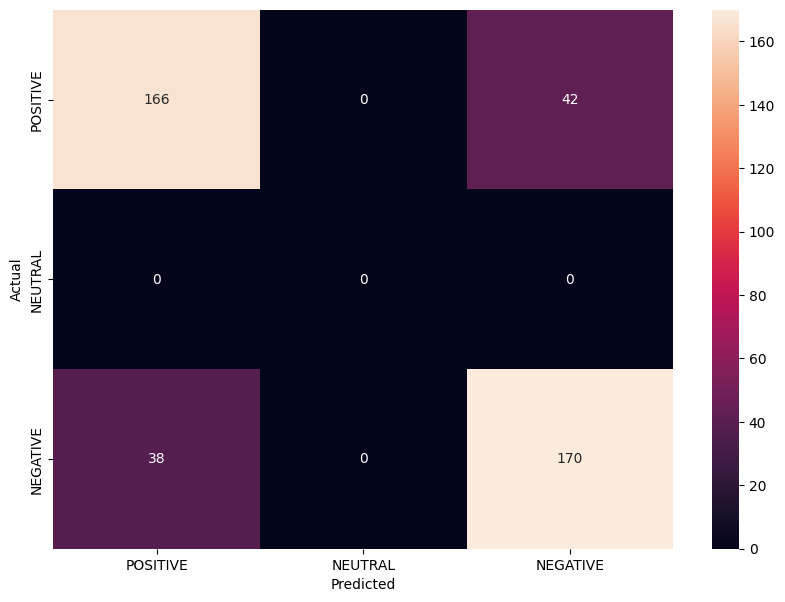

In [17]:
#Confusion Matrix plot of Test Data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

y_pred = clf_svm.predict(test_x_vectors)

labels = [Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]

cm = confusion_matrix(test_y, y_pred, labels=labels)

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Saving Model

Save Model

In [16]:
import pickle

with open('/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/Positive_negative/models/sentiment_classifier.pkl', 'wb') as f :
    pickle.dump(clf, f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/Positive_negative/models/sentiment_classifier.pkl'

Load Model

In [ ]:

with open('/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/Positive_negative/models/sentiment_classifier.pkl', 'rb') as f :
    loaded_clf = pickle.load(f)

In [ ]:
print(test_x[0])
loaded_clf.predict(test_x_vectors[0])

Lists how to intermingle with people by conversation.  How to overcome your unsociable traits and why you developed them in the first place.  To me, I remember when I was a much more social person than I am today.  Thus, it has made me reflect why I became more recluse over the years.  In being reminded by myself, I recall what retracted me out of being an interesting person.  I used to care about new people and strange new ideas and exciting things to do.  I would prefer to think of myself as an outgoing person and that I am young at  hear,t but the truth is that I have regressed from that behavior with age. If you can relate to my ideas, perhaps, this book can encourage you to get back up on the horse once again instead of being a lonely fuddy-duddy.


array(['POSITIVE'], dtype='<U8')